In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image1 = cv2.imread('C:\\Users\\win\\Desktop\\Projet\\bcd\\20230323_191223_BRS_L_UP_11.369_00.png.jpg',cv2.COLOR_BGR2GRAY)
image2 = cv2.imread('C:\\Users\\win\\Desktop\\Projet\\bcd\\20230406_060421_BRS_L_UP_11.369_00.png.jpg', cv2.IMREAD_COLOR)
image1.shape

(487, 176)

In [5]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Faites correspondre les descripteurs entre les images
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.95 * n.distance:
        good_matches.append(m)

# Dessinez les correspondances sur les images
matched_images = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


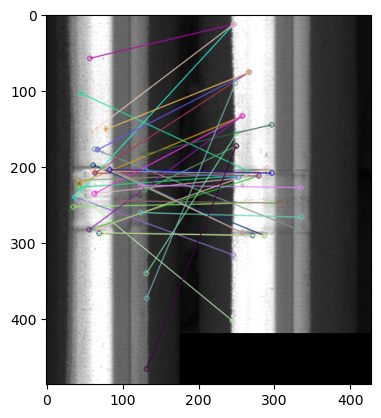

In [6]:
plt.imshow(matched_images)

In [6]:
cv2.imshow('Correspondances SIFT', matched_images)
cv2.waitKey(0)
cv2.destroyAllWindows()
